In [1]:
cd ..

/home/ezequiel


In [2]:
cd pyLIMA-env

/home/ezequiel/pyLIMA-env


In [3]:
cd pyLIMA

/home/ezequiel/pyLIMA-env/pyLIMA


In [4]:
import pyLIMA

In [5]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

from pyLIMA.fits import DE_fit
from pyLIMA.fits import TRF_fit
from pyLIMA.models import PSPL_model
from pyLIMA.models import USBL_model, pyLIMA_fancy_parameters
from pyLIMA.outputs import pyLIMA_plots

from pyLIMA import event
from pyLIMA import telescopes

import glob


In [6]:
your_event = event.Event(ra=268.75425, dec=-29.047111111111114)
your_event.name = 'OB150966'

In [7]:
data_1 = np.loadtxt('examples/data/OGLE_OB150966.dat')
telescope_1 = telescopes.Telescope(name = 'OGLE', 
                                   camera_filter = 'I',
                                   light_curve = data_1.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])

In [8]:
data_2 = np.loadtxt('examples/data/MOA_OB150966.dat')
telescope_2 = telescopes.Telescope(name = 'MOA', 
                                   camera_filter = 'I+R',
                                   light_curve = data_2.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])

In [9]:
data_3 = np.loadtxt('examples/data/SPITZER_OB150966.dat')
telescope_3 = telescopes.Telescope(name = 'SPITZER', 
                                   camera_filter = 'IRAC1',
                                   light_curve = data_3.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])



In [10]:
telescope_3.location = 'Space'
telescope_3.spacecraft_name = 'Spitzer'

In [11]:
data_4 = np.loadtxt('examples/data/DANISH_OB150966.dat')
telescope_4 = telescopes.Telescope(name = 'DANISH', 
                                   camera_filter = 'Z+I',
                                   light_curve = data_4.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])

In [12]:
data_5 = np.loadtxt('examples/data/LCO_CTIO_A_OB150966.dat')
telescope_5 = telescopes.Telescope(name = 'LCO_CTIO_A', 
                                   camera_filter = 'I',
                                   light_curve = data_5.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])

In [13]:
data_6 = np.loadtxt('examples/data/LCO_CTIO_B_OB150966.dat')
telescope_6 = telescopes.Telescope(name = 'LCO_CTIO_B', 
                                   camera_filter = 'I',
                                   light_curve = data_6.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])

In [14]:
data_7 = np.loadtxt('examples/data/LCO_CTIO_OB150966.dat')
telescope_7 = telescopes.Telescope(name = 'LCO_CTIO', 
                                   camera_filter = 'I',
                                   light_curve = data_7.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])

In [15]:
data_8 = np.loadtxt('examples/data/LCO_SAAO_OB150966.dat')
telescope_8 = telescopes.Telescope(name = 'LCO_SAAO', 
                                   camera_filter = 'I',
                                   light_curve = data_8.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])


In [16]:
data_9 = np.loadtxt('examples/data/LCO_SSO_A_OB150966.dat')
telescope_9 = telescopes.Telescope(name = 'LCO_SSO_A', 
                                   camera_filter = 'I',
                                   light_curve = data_9.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])


In [17]:
data_10 = np.loadtxt('examples/data/LCO_SSO_B_OB150966.dat')
telescope_10 = telescopes.Telescope(name = 'LCO_SSO_B', 
                                   camera_filter = 'I',
                                   light_curve = data_10.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])


In [18]:
data_11 = np.loadtxt('examples/data/LCO_SSO_OB150966.dat')
telescope_11 = telescopes.Telescope(name = 'LCO_SSO', 
                                   camera_filter = 'I',
                                   light_curve = data_11.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])

In [19]:
your_event.telescopes.append(telescope_1)
your_event.telescopes.append(telescope_2)
your_event.telescopes.append(telescope_3)
your_event.telescopes.append(telescope_4)
your_event.telescopes.append(telescope_5)
your_event.telescopes.append(telescope_6)
your_event.telescopes.append(telescope_7)
your_event.telescopes.append(telescope_8)
your_event.telescopes.append(telescope_9)
your_event.telescopes.append(telescope_10)
your_event.telescopes.append(telescope_11)

In [20]:
your_event.find_survey('OGLE')

In [21]:
your_event.check_event()

check_event  : Everything looks fine...


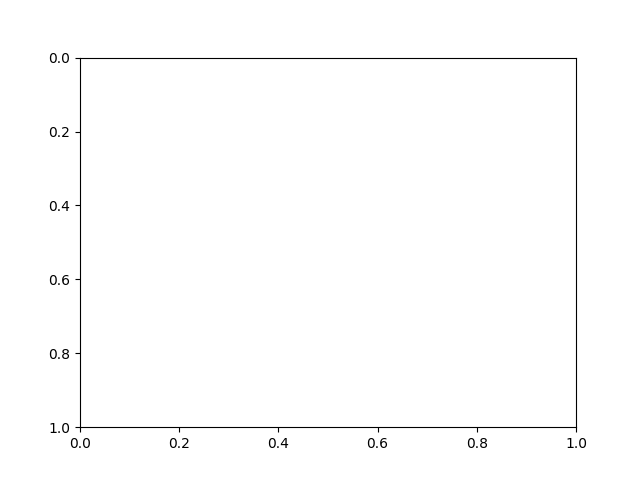

In [22]:
plt.gca().invert_yaxis()

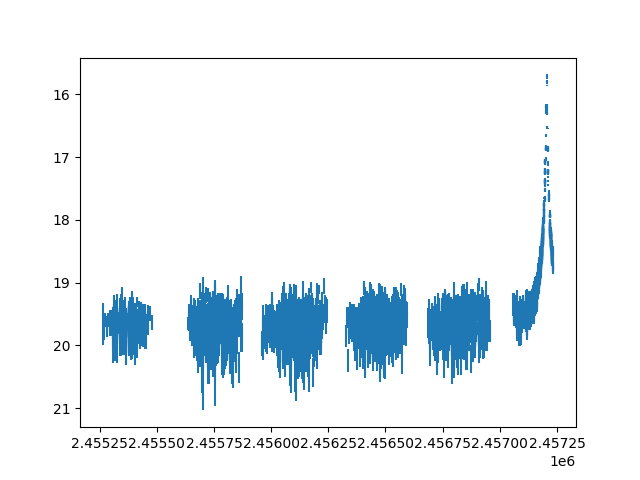

In [23]:
for tel in your_event.telescopes:
    if tel.name == 'OGLE' :
        tel.plot_data()

plt.show()

In [24]:
pspl = PSPL_model.PSPLmodel(your_event)

In [25]:
fit_1 = TRF_fit.TRFfit(pspl)
fit_1.modle_parameters_guess = [2457205,1.0,100.0]


In [26]:
fit_1.fit()

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [2457206.4679405433, 0.02270303560144297, 87.69522054353729, 890.3562315895938, 335.8682061795064, 987.6810800755707, 1498.1779826977813, 81185.93561374549, 45578.36158617502, 2005.8755852337738, 833.9916800852886, 557.7186781323351, 0.0, 1517.5142398294295, -19219.62967411123, 2094.8569939484923, 8648.672992164416, 35.30897971560152, -400.585102212299, 3717.7826813460815, 0.0, 897.3544069619842, 0.0, 63.54208178127509, 0.0]
fit  : Trust Region Reflective fit SUCCESS
best_model: [2457205.2635365804, 0.008868894050375872, 69.92807039113285, 1034.0856877970255, 214.75314092403278, 1034.0032131035766, 1673.338938455484, 7.177505403551469e-36, 32729.832225577695, 1410.4475476864122, 7816.118629048415, 107.32242349264118, -1782.3045270968137, 961.56143715026, 597.6879530952349, 1346.3654228538378, 9277.745436377678, 26.01291446808726, 47.12211990840486, 30.434165840669205, 88.41101563234136, 15.055618819117337, -897.35440696198

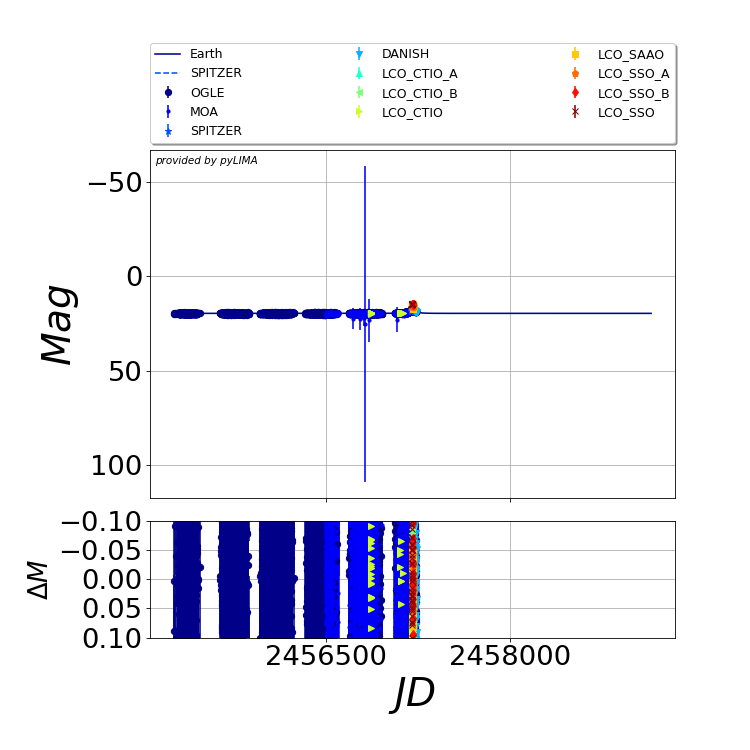

In [27]:
pyLIMA_plots.plot_lightcurves(pspl,fit_1.fit_results['best_model'])
plt.show()

In [28]:
fancy = pyLIMA_fancy_parameters.standard_fancy_parameters
usbl = USBL_model.USBLmodel(your_event, fancy_parameters=fancy,parallax=['Full',2457205.5])

Parallax(Full) estimated for the telescope OGLE: SUCCESS
Parallax(Full) estimated for the telescope MOA: SUCCESS
Successfully ephemeris from JPL!
Parallax(Full) estimated for the telescope SPITZER: SUCCESS
Parallax(Full) estimated for the telescope DANISH: SUCCESS
Parallax(Full) estimated for the telescope LCO_CTIO_A: SUCCESS
Parallax(Full) estimated for the telescope LCO_CTIO_B: SUCCESS
Parallax(Full) estimated for the telescope LCO_CTIO: SUCCESS
Parallax(Full) estimated for the telescope LCO_SAAO: SUCCESS
Parallax(Full) estimated for the telescope LCO_SSO_A: SUCCESS
Parallax(Full) estimated for the telescope LCO_SSO_B: SUCCESS
Parallax(Full) estimated for the telescope LCO_SSO: SUCCESS


In [30]:
fit_2 = DE_fit.DEfit(usbl, telescopes_fluxes_method='polyfit', DE_population_size=10, max_iteration=10000, display_progress=True)

In [31]:
fit_2.fit_parameters['t0'][1] = [2457195.00, 2457215.00] # t0 limits
fit_2.fit_parameters['u0'][1] = [0.001, 0.2] # u0 limits
fit_2.fit_parameters['log_tE'][1] = [1.6, 2.0] # logtE limits in days
fit_2.fit_parameters['log_rho'][1] = [-3.3, -1.3] # logrho
fit_2.fit_parameters['log_separation'][1] = [0.0, 0.5] # logs limits
fit_2.fit_parameters['log_mass_ratio'][1] = [-4.0, -1.3] # logq limits
fit_2.fit_parameters['alpha'][1] = [-3.14, 3.14] # alpha limits (in radians)
fit_2.fit_parameters['piEN'][1] = [-0.5, 0.5]
fit_2.fit_parameters['piEE'][1] = [-0.5, 0.5]

In [33]:
import multiprocessing as mul
pool = mul.Pool(processes = 4)

In [34]:
perform_long_fit = False

In [36]:
if perform_long_fit == True:
    fit_2.fit(computational_pool = pool)
    
    # Save it
    np.save('results_USBL_DE_966.npy', fit_2.fit_results['DE_population'])

else:
    # Use the precomputed Differential Evolution (DE) results:
    fit_2.fit_results['DE_population'] = np.load('examples/data/results_USBL_DE_966.npy')
    fit_2.fit_results['best_model'] = fit_2.fit_results['DE_population'][346501][0:-1]
    #fit_2.fit_results['best_model'] = [2457205.21, 0.0109583755, 1.78218726, -2.89415218, 0.0475121003, -3.79996021, 2.25499875, 0.0227712230, -0.227192561]



In [37]:
print('Best_model', fit_2.fit_results['best_model'])

Best_model [ 2.45720521e+06  1.09583755e-02  1.78218726e+00 -2.89415218e+00
  4.75121003e-02 -3.79996021e+00  2.25499875e+00  2.27712230e-02
 -2.27192561e-01]


Parallax(Full) estimated for the telescope OGLE: SUCCESS
Parallax(Full) estimated for the telescope SPITZER: SUCCESS


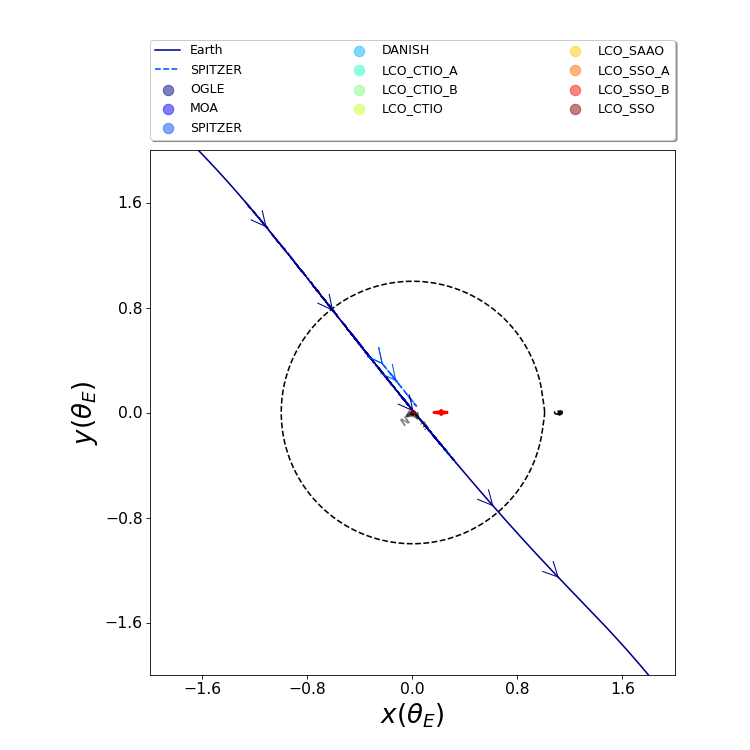

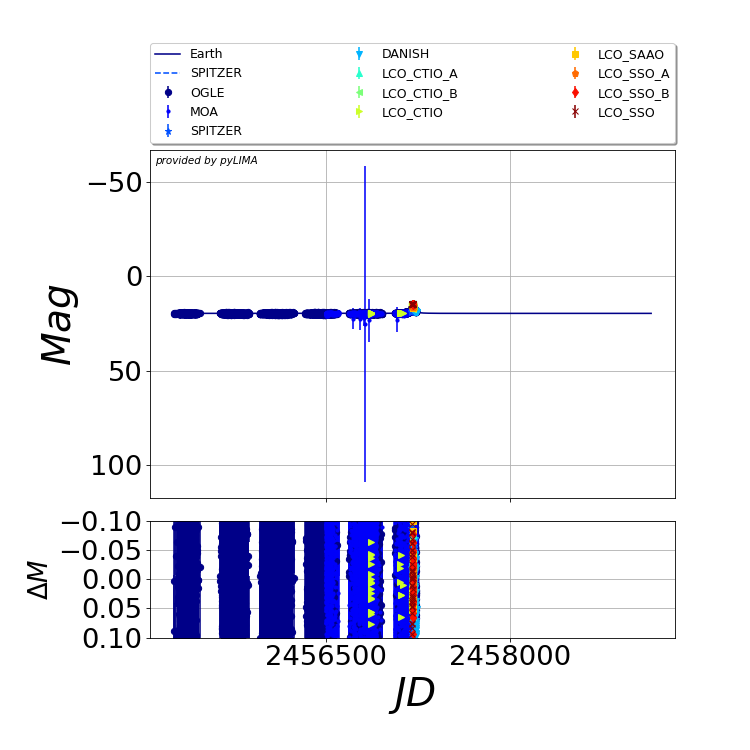

In [38]:
pyLIMA_plots.list_of_fake_telescopes = []
pyLIMA_plots.plot_lightcurves(usbl, fit_2.fit_results['best_model'])
pyLIMA_plots.plot_geometry(usbl, fit_2.fit_results['best_model'])
plt.show()
